In [5]:
%reload_ext autoreload
%autoreload 2
from src.data_handlers.bolometer_handler import get_filtered_bolometer_data, \
    get_x_point_pos
from src.GPT.gp_inference import performGP, calculate_timeseries_fast
from src.GPT.profiles import get_profile_time_series, get_profile_from_coords
import aug_sfutils as sf
import numpy as np
import matplotlib.pyplot as plt
from src.GPT.error_model import get_std
from src.constants import PARAMS_STATIC_CART
from src.data_handlers.meq_handler import MEQ_handler
from src.data_handlers.idf_handler import IDF_handler
from src.data_handlers.powerbalance_handler import Powerbalance_handler

In [80]:
timebase_bolo, bolo = get_filtered_bolometer_data(35894)
tidx = np.argmin(np.abs(timebase_bolo - 3.5))
tidx

17:40:15 | aug_sfutils.sfread | INFO: Fetching SF /afs/ipp-garching.mpg.de/home/a/augd/shots/3589/L1/BLB/35894.1
17:40:15 | aug_sfutils.sfread | INFO: Fetching SF /afs/ipp-garching.mpg.de/home/a/augd/shots/3588/L1/BLC/35887.1
17:40:15 | aug_sfutils.sfread | INFO: Fetching SF /afs/ipp-garching.mpg.de/home/a/augd/shots/3588/L1/BLC/35887.1
17:40:16 | aug_sfutils.sfread | WARNING: Inconsitent sizes in calibration PSet powFVC
17:40:16 | aug_sfutils.sfread | INFO: Fetching SF /afs/ipp-garching.mpg.de/home/a/augd/shots/3588/L1/BLC/35887.1
17:40:16 | aug_sfutils.sfread | WARNING: Inconsitent sizes in calibration PSet powFDC


8710

In [81]:
bolo_at_t = bolo[tidx]
std = get_std(bolo_at_t)

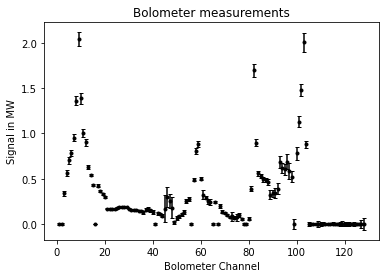

In [144]:
plt.errorbar(np.arange(1,129), bolo_at_t/1e6, yerr=std/1e6, fmt=".k", markersize=6, capsize=2)
plt.ylabel("Signal in MW")
plt.xlabel("Bolometer Channel")
plt.title("Bolometer measurements")
plt.savefig("bolometer_measurement_35894at3.5.png", dpi=350, transparent=True)

In [83]:
emis, _ = performGP(bolo_at_t, params=PARAMS_STATIC_CART)

In [84]:
from src.GPT.plot_helper import plot_emission, plot_saver

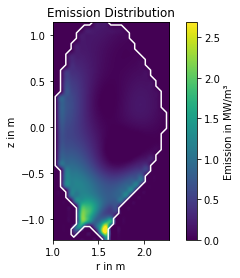

In [145]:
plot_emission(emis, title="Emission Distribution")
plt.savefig("emission_35894at3.5.png", dpi=350, transparent=True)

In [86]:
idf = IDF_handler(35894)
meq = MEQ_handler(35894, idf)

17:40:19 | aug_sfutils.sfread | INFO: Fetching SF /afs/ipp-garching.mpg.de/home/a/augd/shots/3589/L1/IDF/35894.2
/afs/ipp-garching.mpg.de/home/k/komo/Nextcloud/Studium/master-thesis/Code/src/data_handlers/idf_handler.py:230: RuntimeWarning: divide by zero encountered in true_divide
  q_sa_shear[i, :] = q**2 * a**2 / r**2 * np.gradient(q, r)
/afs/ipp-garching.mpg.de/home/k/komo/Nextcloud/Studium/master-thesis/Code/src/data_handlers/idf_handler.py:268: RuntimeWarning: invalid value encountered in log
  cl1 = 24 - 0.5*np.log(ne/1e6) + np.log(Te)
/afs/ipp-garching.mpg.de/home/k/komo/Nextcloud/Studium/master-thesis/Code/src/data_handlers/idf_handler.py:253: RuntimeWarning: invalid value encountered in sqrt
  cs = np.sqrt(1.602e-19 * self.te / (2 * 1.672e-27))
/afs/ipp-garching.mpg.de/home/k/komo/Nextcloud/Studium/master-thesis/Code/src/data_handlers/idf_handler.py:256: RuntimeWarning: invalid value encountered in power
  collision_frequency = self.te**-1.5 * self.ne * coulomb_log
17:40:20 |

In [88]:
rho, _ = meq.get_magnetic_time_series(timebase_bolo[tidx:tidx+1])
rho = rho[0]

In [93]:
profile, rho_of_profile = get_profile_from_coords(emis, rho)

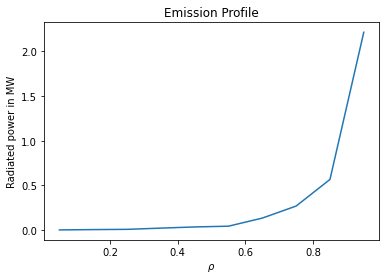

In [146]:
plt.plot(rho_of_profile, profile/1e6)
plt.xlabel(r"$\rho$")
plt.ylabel("Radiated power in MW")
plt.title("Emission Profile")
plt.savefig("radiation_profile_35894at3.5.png", dpi=350, transparent=True)


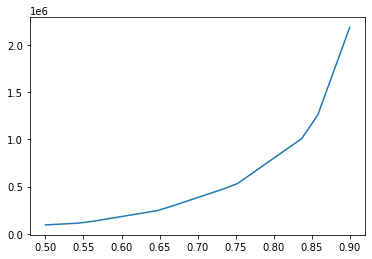

In [129]:
from scipy.interpolate import interp1d
rho_new = np.linspace(0.5, 0.9, 20)
spl = interp1d(rho_of_profile, np.cumsum(profile))
profile_new = spl(rho_new)
plt.plot(rho_new, profile_new)

<Figure size 432x288 with 0 Axes>

In [99]:
powh = Powerbalance_handler(idf, meq)

In [119]:
radiated_power = powh.get_radiated_power()

17:57:33 | aug_sfutils.sfread | INFO: Fetching SF /afs/ipp-garching.mpg.de/home/a/augd/shots/3589/L1/BLB/35894.1
17:57:33 | aug_sfutils.sfread | INFO: Fetching SF /afs/ipp-garching.mpg.de/home/a/augd/shots/3588/L1/BLC/35887.1
17:57:34 | aug_sfutils.sfread | INFO: Fetching SF /afs/ipp-garching.mpg.de/home/a/augd/shots/3588/L1/BLC/35887.1
17:57:34 | aug_sfutils.sfread | WARNING: Inconsitent sizes in calibration PSet powFVC
17:57:34 | aug_sfutils.sfread | INFO: Fetching SF /afs/ipp-garching.mpg.de/home/a/augd/shots/3588/L1/BLC/35887.1
17:57:34 | aug_sfutils.sfread | WARNING: Inconsitent sizes in calibration PSet powFDC
17:57:35 | aug_sfutils.sfread | INFO: Fetching SF /afs/ipp-garching.mpg.de/home/a/augd/shots/3589/L1/IDE/35894.2


Performing GPT for frame 207 of 208


In [120]:
tidx2 = np.argmin(np.abs(powh.timebase - 3.5))

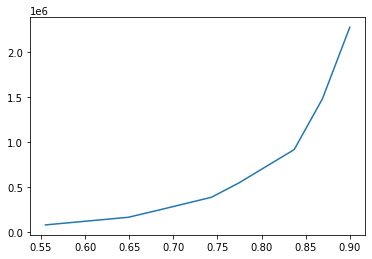

In [121]:
plt.plot(powh.rho_intervals[tidx2], radiated_power[tidx2])

In [114]:
radiated_power[tidx2]

array([  32621.63138676,   51455.75038199,   70289.86937721,
         89731.54059809,  134441.12038623,  181483.28311955,
        227055.37826745,  322282.71562647,  435531.86797462,
        545241.98431189,  966499.60274547, 1578749.84795898])

In [115]:
np.cumsum(radiated_power[tidx2])

array([  32621.63138676,   84077.38176875,  154367.25114596,
        244098.79174405,  378539.91213027,  560023.19524982,
        787078.57351727, 1109361.28914374, 1544893.15711836,
       2090135.14143026, 3056634.74417573, 4635384.5921347 ])

In [6]:
idf = IDF_handler(32214)

15:15:09 | aug_sfutils.sfread | INFO: Fetching SF /afs/ipp-garching.mpg.de/home/a/augd/shots/3221/L1/IDF/32214.2
/afs/ipp-garching.mpg.de/home/k/komo/Nextcloud/Studium/master-thesis/Code/src/data_handlers/idf_handler.py:230: RuntimeWarning: divide by zero encountered in true_divide
  q_sa_shear[i, :] = q / r * np.gradient(q, r)


In [ ]:
meq = MEQ_handler(32214, idf)